In [270]:
noise_trials.delete_all()

In [1]:
%reload_ext autoreload
%autoreload 2

import json
from collections import namedtuple
from hyperopt import fmin, tpe, hp
from hyperopt.mongoexp import MongoTrials

from ddpg_agent.QuadcopterEvaluator import noise_evaluator, evaluator

EXP_NUM=6

noise_trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key='quadcopter_noise_exp%03i'%EXP_NUM)

noise_space = namedtuple('NoiseParams',['ou_mu','ou_theta','ou_sigma','n_episodes','eps'])(
        0,
        hp.uniform('ou_theta',0,.5),
        1,
        5,
        hp.uniform('eps',1,100),
    )

best_noise = fmin(noise_evaluator, noise_space, trials=noise_trials, algo=tpe.suggest, max_evals=1 )

print(best_noise)

Using TensorFlow backend.
over-writing old domain trials attachment


0it [00:00, ?it/s, best loss: ?]
{'eps': 46.891489923679316, 'ou_theta': 0.30337139839111243}


In [2]:
noise_trials.best_trial

SON([('_id', ObjectId('5d2e7f1a2db57de540b741ee')), ('state', 2), ('tid', 1612), ('spec', None), ('result', SON([('status', 'ok'), ('loss', 248.46575031650778), ('loss_variance', 440.97510572005007), ('scores', [-274.07241048553044, -222.6360287584833, -248.68881170550958])])), ('misc', SON([('tid', 1612), ('cmd', ['domain_attachment', 'FMinIter_Domain']), ('workdir', None), ('idxs', SON([('eps', [1612]), ('ou_theta', [1612])])), ('vals', SON([('eps', [46.891489923679316]), ('ou_theta', [0.30337139839111243])]))])), ('exp_key', 'quadcopter_noise_exp006'), ('owner', ['MbAir.local:69588']), ('version', 4), ('book_time', datetime.datetime(2019, 7, 17, 1, 51, 26, 243000)), ('refresh_time', datetime.datetime(2019, 7, 17, 1, 51, 48, 847000)), ('_attachments', [['history', ObjectId('5d2e7f34360f22a7f4564410')]])])

In [3]:
s=dict(noise_trials.trial_attachments(noise_trials.best_trial))['history']
s[:1000]

b'[{"test_episodes": [], "training_episodes": [{"episode_idx": 1, "epsilon": 46.891489923679316, "steps": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], "first_step": 0, "last_step": 24, "states": [[0.0, 0.0, 10.000798589138364, 0.04121486669688679, 0.002795365447164855, 0.0, 0.0, 0.0, 0.07985891383650119, 0.28710578780960466, 0.07477119026958168, 0.0, -7.716591585310084e-06, 0.0001137408662728654, 10.003191910636538, 0.08807338969395317, 0.007084808004931276, 0.0, -0.0007716591585310083, 0.011374086627286539, 0.15947323598073046, 0.5738684326602707, 0.14952436749135595, 0.0, -4.2705679596934776e-05, 0.0005840096907962602, 10.007168889603046, 0.14035910018339948, 0.012864245293175536, 0.0, -0.0027272496426314612, 0.035652795825052944, 0.23822466067009102, 0.8595547705773665, 0.22420970659371037, 0.0], [-0.0001335350273399414, 0.001691636245472894, 10.0127640492192, 0.23671580192878583, 0.02540242572767948, 0.0, -0.0063556851316692005, 0.0751

In [4]:
ep_history = json.loads(s)

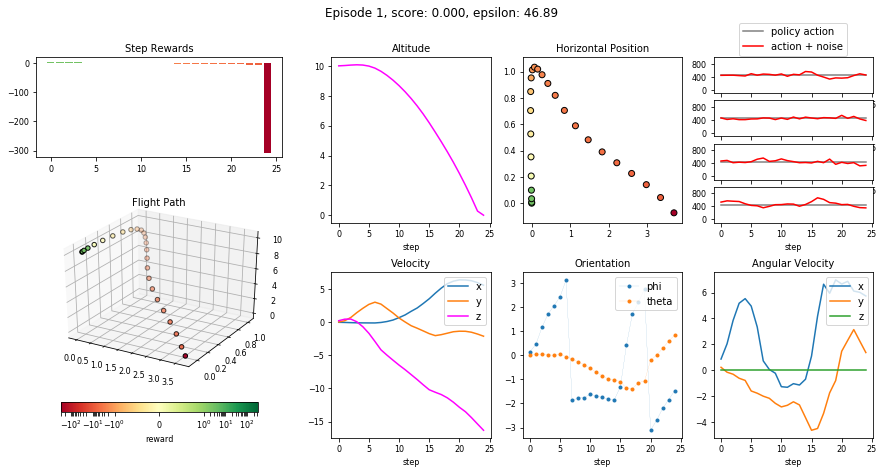

In [11]:
ep = EpisodeHistory._fromDict(ep_history[0]['training_episodes'][0])

plot_quadcopter_episode(ep)

In [ ]:
learning_params = namedtuple('LearningParams',[
    'ou_mu','ou_theta','ou_sigma','n_episodes','eps',
    'eps_decay','primary_exploration_eps','act_random_first_n_episodes',
    'discount_factor','replay_buffer_size','replay_batch_size',
    'tau_actor','tau_critic','lr_actor','lr_critic',
])(
    0, 0.2, 1, 400, hp.uniform('eps',2,10),
    0, 2, 50,
    hp.uniform('discount_factor',.5,.99), 100000, hp.choice('replay_batch_size',[256,512,1028]), 
    hp.uniform('tau_actor',.1,.9),
    hp.uniform('tau_critic',.1,.9),
    hp.uniform('lr_actor',.00001,.005),
    hp.uniform('lr_critic',.00001,.005),
)


learning_trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key='quadcopter_learning_exp%03i'%EXP_NUM)
best_learning_params = fmin(evaluator, learning_params, trials=learning_trials, algo=tpe.suggest, max_evals=198 )
print(best_learning_params)